# Heart Disease - dataSet 

### Prevendo Doenças do Coração com PYTHON
Esse é um desafio Kaggle.

***Sobre as colunas:***

* age : The person's age in years<br>
* sex : The person's sex (1 = male, 0 = female)<br>
* cp : The chest pain experienced (Value 1: typical angina, Value: 2: atypical angina, 
        Value 3: non-anginal pain, Value 4: asymptomatic)<br>
* trestbps : The person's resting blood pressure (mm Hg on admission to the hospital)<br>
* chol : The person's cholesterol measurement in mg/dl<br>
* fbs : The person's fasting blood sugar ( > 120 mg/dl, 1 = true; 0 = false )<br>
* restecg : Resting electrocardiographic measurement
  ( 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or -definite left ventricular hypertrophy by Este's criteria)<br>
* thalach : The person's maximum heart rate achieved<br>
* exang : Exercise induced angina ( 1 = yes; 0 = o )<br>
* oldpeak : ST depression induced by exercise relative to rest ( 'ST' relates to positions on the ECG plot)
* slope : The slope of the peak exercise ST segment ( Value 1: upsloping, Value 2: flat, Value 3: downsloping )<br>
* ca : The number of major vessels (0-3)<br>
* thal : A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
* target : Heart disease (0 = Não, 1 = Sim)<br>

In [1]:
%matplotlib widget

import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


sns.set_style('whitegrid')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
## Verificando se tem valores null
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
## Verificando se tem valores duplicados
df.duplicated().sum()

723

In [7]:
## Retirando os valores dupliados
hd = df.drop_duplicates()
hd

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3       0  
2        0   0     3       0  
3        2   1     3       0  
4        1   3     2       0  
..     ...  ..   ...     ...  
723      1   0     2       1  
733      1   0     2       1  
739      2   1     3       0  
843      2   0     2       0  
878      1   1     3       0  

[302 rows x 14 columns]

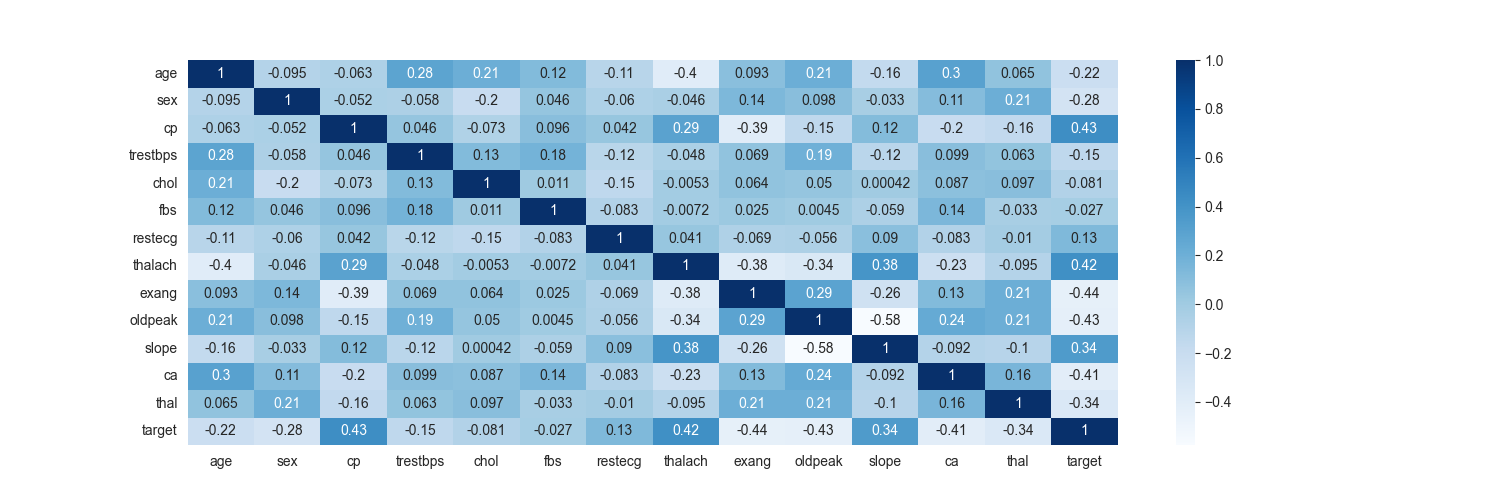

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(hd.corr(), annot=True, cmap='Blues')
plt.show()

In [9]:
hd.head(2)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   

   ca  thal  target  
0   2     3       0  
1   0     3       0

In [10]:
'''Separando as informações - separar todas as variávies (colunas) 
que contém as variáveis nominal e númericas. '''

for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [11]:
categoricas = ['sex','cp','fbs','restecg','exang','slope', 'ca', 'thal']
numericas = ['age','trestbps','chol','thalach','oldpeak']

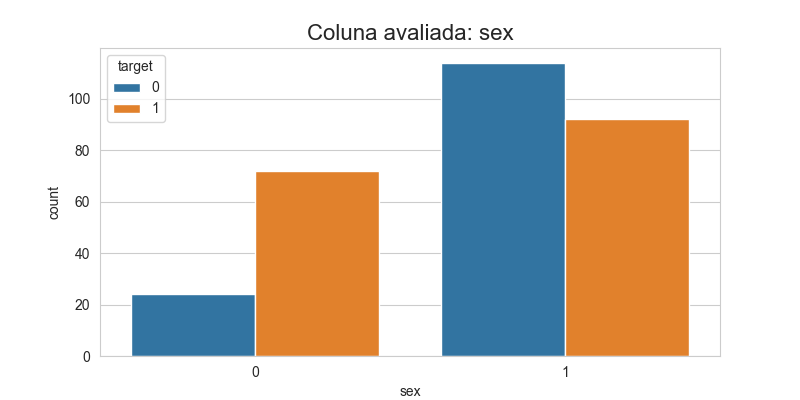

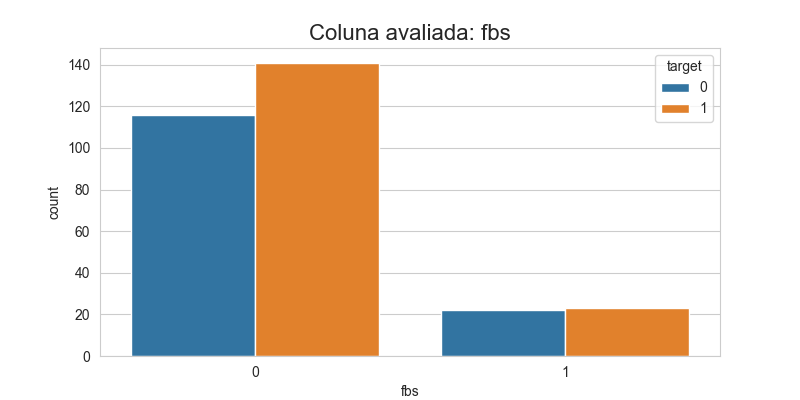

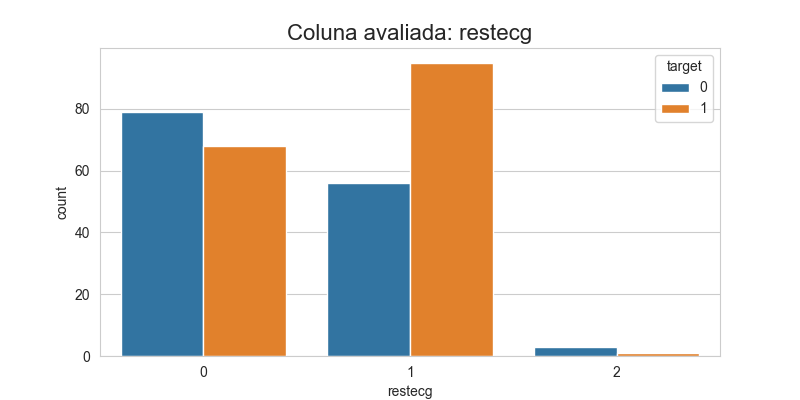

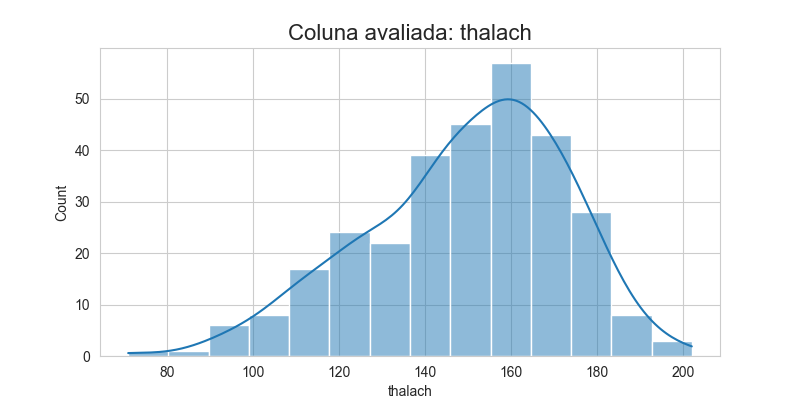

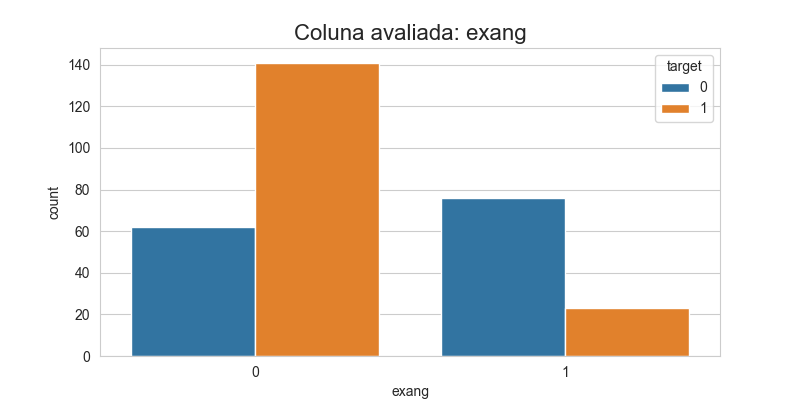

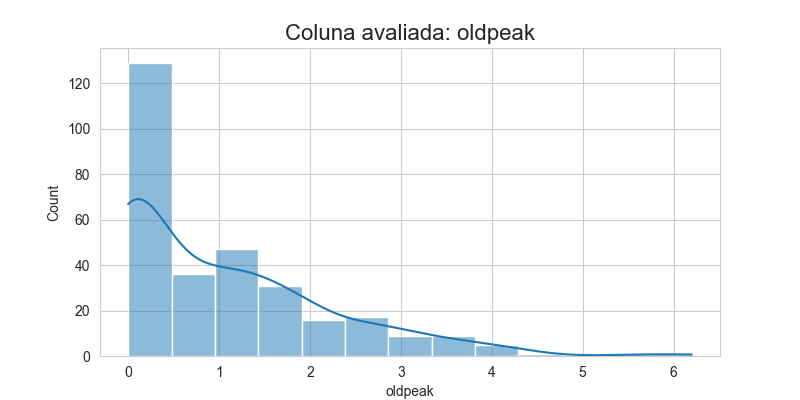

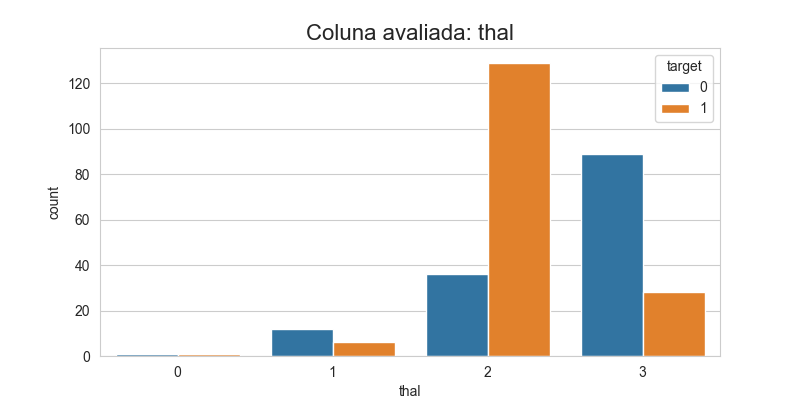

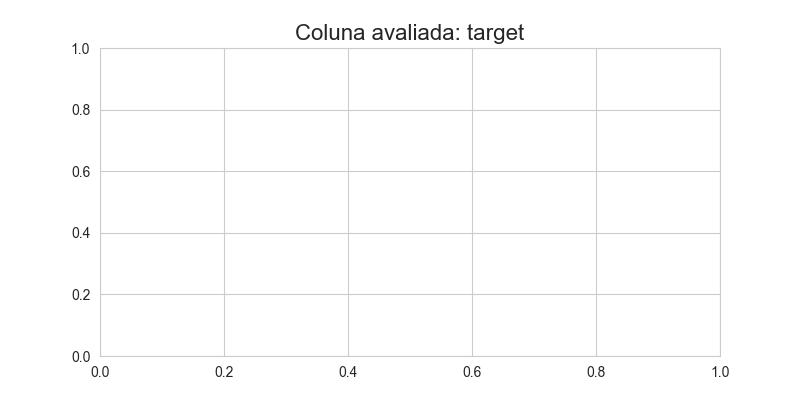

In [12]:
for c in hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 16)
    if c in categoricas:
        sns.countplot(x = hd[c], hue = hd['target'])
    if c in numericas:
        sns.histplot(hd[c], kde = True)


## Removendo Outliers

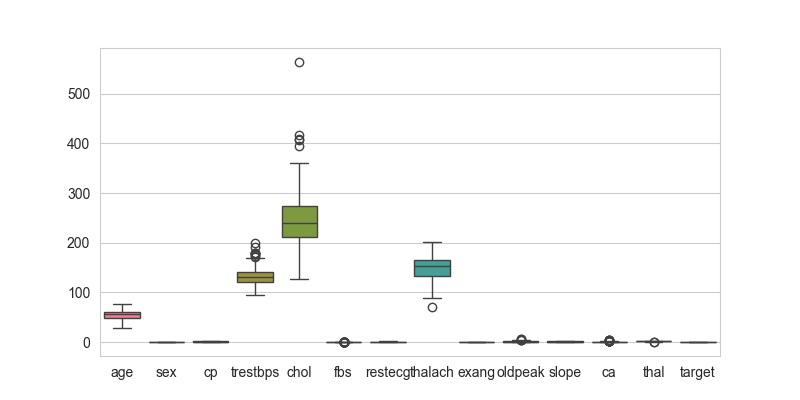

In [27]:
plt.figure(figsize = (8,4))
sns.boxplot(data = hd)
plt.show()